# Cadences with Radar Plots

* Create two kinds of radar plots:  by Tone (just the final of the cadences), or Combined_Types (with final and type of cadence).




In [1]:
import intervals
from intervals import * 
from intervals import main_objs
import intervals.visualizations as viz
import pandas as pd
import re
import altair as alt 
from pyvis.network import Network
import glob as glob
import os
from IPython.display import SVG
import plotly.graph_objects as go
import plotly.offline as pyo

MYDIR = ("saved_csv")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)

else:
    print(MYDIR, "folder already exists.")
    
MUSDIR = ("Music_Files")
CHECK_FOLDER = os.path.isdir(MUSDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MUSDIR)
    print("created folder : ", MUSDIR)

else:
    print(MUSDIR, "folder already exists.")

saved_csv folder already exists.
Music_Files folder already exists.


In [2]:

### The Functions.  Do not Edit!

def createRadarElement(one_row_df):
    return go.Scatterpolar(
        r = one_row_df.iloc[0].tolist() + [one_row_df.iloc[0].tolist()[0]], 
        theta = one_row_df.columns.values.tolist() + [one_row_df.columns.values.tolist()[0]], 
        mode = 'lines')

# for a corpus:

def create_radar_plots(list_of_pieces, features): 
    data = []
    names = ""
    for work in corpus_list:
        piece = importScore(work)
        cadences = piece.cadences()
        if len(cadences) == 0:
            print("No cadences found in the piece")
        if plot_type == "Tone":
            cadences["Combined_Type"] = cadences["Tone"]
        else:
            cadences["Combined_Type"] = cadences["Tone"] + "_" + cadences["CadType"]
            
        grouped_combined = pd.DataFrame(cadences.groupby(['Combined_Type']).size().reset_index(name='counts'))
        graph_df = pd.DataFrame(columns=grouped_combined["Combined_Type"].tolist())
        graph_df.loc[0] = grouped_combined["counts"].tolist()

        local_data = createRadarElement(graph_df)
        local_data.name = piece.metadata['title']
        data.append(local_data)
        names += ("\n" + (piece.metadata['composer'] + ": " + piece.metadata['title']))
    fig = go.Figure(data, )
    title = "Pieces: \n" + names
    fig.update_layout(title_text=title)
    fig.show(renderer='svg')

# for just one piece

def create_radar_plot(piece, features): 
    cadences = piece.cadences()
    if len(cadences) == 0:
        print("No cadences found in the piece")
        return None
    if plot_type == "Tone":
        cadences["Combined_Type"] = cadences["Tone"]
    else:
        cadences["Combined_Type"] = cadences["Tone"] + "_" + cadences["CadType"]
    grouped_combined = pd.DataFrame(cadences.groupby(['Combined_Type']).size().reset_index(name='counts'))
    graph_df = pd.DataFrame(columns=grouped_combined["Combined_Type"].tolist())
    graph_df.loc[0] = grouped_combined["counts"].tolist()

    data = createRadarElement(graph_df)
    data.name = piece.metadata['title']
    fig = go.Figure(data, )
    title = piece.metadata['composer'] + ": " + piece.metadata['title']
    fig.update_layout(title_text=title)
    fig.show(renderer='svg')

### Load One Piece

In [3]:
# Select a prefix:
prefix = 'https://crimproject.org/mei/'
# prefix = 'Music_Files/'
# just add the CRIM Piece ID here
mei_file = 'CRIM_Model_0008.mei'


# combine strings and import
url = prefix + mei_file
piece = importScore(url)
print(piece.metadata)

Successfully imported https://crimproject.org/mei/CRIM_Model_0008.mei
{'title': 'Ave Maria', 'composer': 'Josquin Des Prés'}


### Select Plot Type

`plot_type = "Tone"`

or

`plot_type = "Combined_Type"`

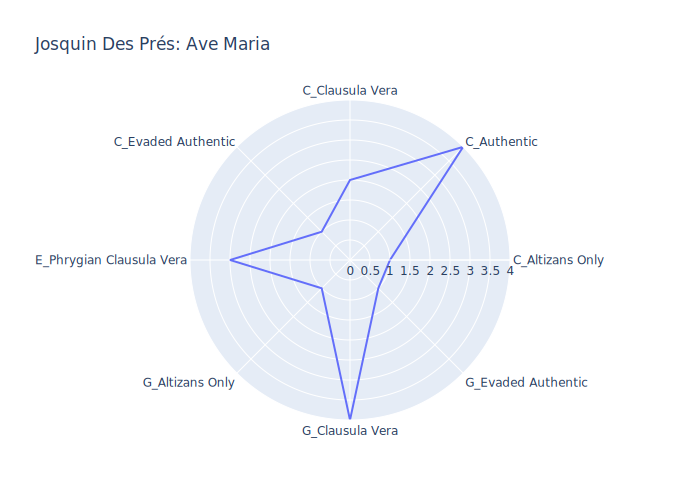

In [4]:

# select Plot Type:  'Tone' or "Combined_Types"

plot_type = "Combined_Type"


#
features = "Combined_Type"
cadences = piece.cadences().fillna('')
if plot_type == "Tone":
    cadences["Combined_Type"] = cadences["Tone"]
else:
    cadences["Combined_Type"] = cadences["Tone"] + "_" + cadences["CadType"]
grouped_combined = cadences.groupby(["Combined_Type"]).size().reset_index(name='counts')
create_radar_plot(piece, features)



In [10]:
cadences

,CadType,LeadingTones,CVFs,Low,RelLow,Tone,RelTone,TSig,Measure,Beat,Sounding,Progress,SinceLast,ToNext,Combined_Type
188.0,Evaded Authentic,1,TCb,E3,M3,G,P5,4/2,24,3.0,3.0,0.145963,188.0,44.0,G_Evaded Authentic
232.0,Evaded Authentic,1,CuTb,A2,-m3,C,P8,4/2,30,1.0,4.0,0.180124,44.0,40.0,C_Evaded Authentic
272.0,Phrygian Clausula Vera,1,CT,E4,M10,E,M3,4/2,35,1.0,2.0,0.211180,40.0,32.0,E_Phrygian Clausula Vera
304.0,Phrygian Clausula Vera,1,ACT,E3,M3,E,M3,4/2,39,1.0,3.0,0.236025,32.0,112.0,E_Phrygian Clausula Vera
416.0,Authentic,1,CTB,C3,P1,C,P8,4/2,53,1.0,4.0,0.322981,112.0,56.0,C_Authentic
472.0,Authentic,1,CTB,C3,P1,C,P8,4/2,60,1.0,4.0,0.366460,56.0,40.0,C_Authentic
512.0,Clausula Vera,1,tCT,C3,P1,C,P8,4/2,65,1.0,3.0,0.397516,40.0,96.0,C_Clausula Vera
608.0,Authentic,1,CTB,C3,P1,C,P8,4/2,77,1.0,3.0,0.472050,96.0,32.0,C_Authentic
640.0,Clausula Vera,1,TC,C3,P1,G,P5,4/2,81,1.0,4.0,0.496894,32.0,24.0,G_Clausula Vera
664.0,Clausula Vera,1,TC,G3,P5,G,P5,4/2,84,1.0,4.0,0.515528,24.0,24.0,G_Clausula Vera


### On a Corpus of Pieces (from URLs)

* Create Piece List:

See **corpus methods** for ways to build a corpus of pieces from CRIM or your own repository

               
* Select plot type:


> `plot_type = "Tone"` or  `plot_type = "Combined_Type"`

In [5]:
# Import Your Mass and Model as a combined Corpus:
corpus_list = []
prefix = 'https://crimproject.org/mei/CRIM_Model_'

# select IDs for your Mass and Model
model_id = "0008"  # <==  put your model number here!
mass_id = "0005" # <== put your Mass number here!
model = prefix + model_id + '.mei'
corpus_list.append(model)
for l in range(1, 6):
    mass = f'https://crimproject.org/mei/CRIM_Mass_{mass_id}_{l:01}.mei'
    corpus_list.append(mass)
corpus_list[5]

'https://crimproject.org/mei/CRIM_Mass_0005_5.mei'

Previously imported piece detected.
Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_1.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_2.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_3.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_4.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_5.mei


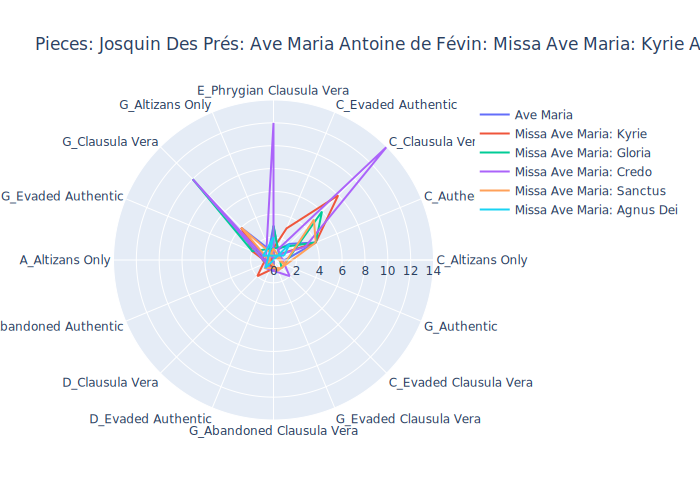

In [6]:


# Make the corpus cadence plot here
# select Plot Type:  'Tone' or "Combined Types"

plot_type = "Combined Type"

create_radar_plots(corpus_list, plot_type)